## Feature Extraction

1) Time and frequency domain

2) Mean, median, standard deviation, peak values

3) Absolute integral

4) Power ratio of the frequency bands 0-2.75Hz and 0-5Hz

5) Peak frequency of the power spectral density (PSD)

6) Spectral entropy of the normalized PSD

7) Take synchronized data from the three IMUs: Mean, standard deviation, absolute integral and energy are calculated on 3 axes of each of the IMUs pairwise

8) Heart rate: features (normalized) mean and gradient. (Note: Normalization is done on the interval defined by resting and maximum HR)

9) And more...

In [1]:
import dataprocess as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Prepare samples

In [2]:
# Load subject101, 102, 103
colName=dp.exportColName()
data=dp.loadSubjects([1,2,3])

In [3]:
# Remove actID=0 and acc6g and orientation data
effectiveData=dp.removeAct0(data)
effectiveData=dp.removeAcc6gOri(effectiveData)

In [4]:
# Fill NaN by linear interpolation
noNaNData=dp.interpolateNaN(effectiveData, method='linear')

In [5]:
# Remove heads and tails of all activities from all subjects:
actDict=dp.throwAllHeadsAndTails(noNaNData, dt=10)

In [6]:
# Cut all spectra into 1-sec-long segments:
dataDict=dp.chopAllSpectra(actDict, duration=5.12, withT=True)

Checking discontinuity Count...
actID=1,	 count=0/662
actID=2,	 count=0/681
actID=3,	 count=0/614
actID=17,	 count=0/740
actID=16,	 count=0/575
actID=12,	 count=0/297
actID=13,	 count=0/289
actID=4,	 count=0/769
actID=7,	 count=0/450
actID=6,	 count=0/437
actID=5,	 count=0/255
actID=24,	 count=0/211


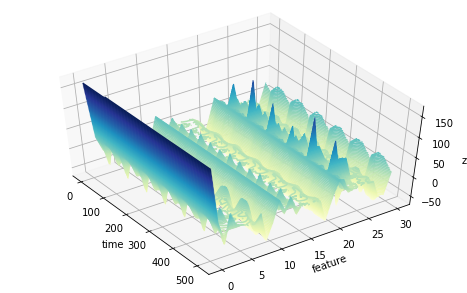

In [7]:
# Show a segment (the no.101 data of actID=7) (without showing timestamp and actID in the contour)
dp.showContour(dataDict[5][100][:, 2:])

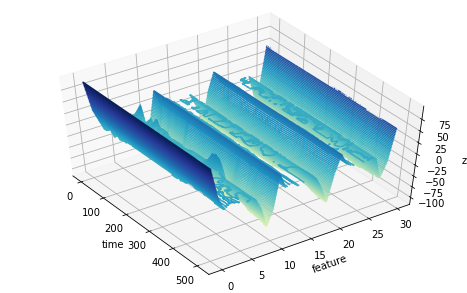

In [35]:
dp.showContour(dataDict[17][100][:, 2:])

## Feature Extraction: Time domain

Help with tsfresh package.

In [14]:
import tsfresh.feature_extraction.feature_calculators as ft_cal

In [36]:
# 1. Create a dictionary to store the feature data for actID=5
# 2. Transform segment data format into tsfresh-compatible format:
act5DFlist=[]
for i in range(len(dataDict[5])):
    act5DFlist.append(dp.toTsfreshFormat(dataDict[5][i]))

act17DFlist=[]
for i in range(len(dataDict[5])):
    act17DFlist.append(dp.toTsfreshFormat(dataDict[17][i]))

In [37]:
act17DFlist[25].head()

,activityID,timestamp,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,...,ankle_temp,ankle_acc16g_x,ankle_acc16g_y,ankle_acc16g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
0,17.0,893.05,100.0,33.25,-2.89722,2.83408,7.41520,0.135691,1.16435,0.780773,...,33.8125,9.77243,-1.048260,-0.179584,-0.123134,0.111788,-0.060290,-61.6433,-16.2675,38.2781
1,17.0,893.06,100.0,33.25,-2.92323,2.23137,7.87869,0.202494,1.17050,0.689092,...,33.8125,9.81975,-1.051390,0.168227,-0.087035,0.117513,-0.015241,-61.2066,-15.7248,37.7852
2,17.0,893.07,100.0,33.25,-2.81066,2.11668,7.88076,0.193440,1.13596,0.595943,...,33.8125,9.81245,-0.973201,-0.102460,-0.139783,0.069501,-0.044188,-60.9853,-15.9435,37.0384
3,17.0,893.08,100.0,33.25,-2.71690,2.42364,8.34298,0.239003,1.10288,0.550348,...,33.8125,9.66356,-1.238670,-0.025161,-0.083829,0.139882,-0.038654,-62.0948,-16.2468,37.9107
4,17.0,893.09,100.0,33.25,-2.46290,3.26191,8.95975,0.290973,1.01048,0.442759,...,33.8125,9.69698,-1.161690,-0.179654,-0.023806,0.045921,-0.037802,-61.9775,-16.6905,37.7812


### 1) Mean, median, standard deviation, peak values, absolute integral

In [45]:
hand_acc16g_x_mean5 = np.array([ft_cal.mean(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median5 = np.array([ft_cal.median(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy5 = np.array([ft_cal.abs_energy(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max5 = np.array([ft_cal.maximum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min5 = np.array([ft_cal.minimum(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std5 = np.array([ft_cal.standard_deviation(act5DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

hand_acc16g_x_mean17 = np.array([ft_cal.mean(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_median17 = np.array([ft_cal.median(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_absEnergy17 = np.array([ft_cal.abs_energy(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_max17 = np.array([ft_cal.maximum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_min17 = np.array([ft_cal.minimum(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])
hand_acc16g_x_std17 = np.array([ft_cal.standard_deviation(act17DFlist[i].hand_acc16g_x) for i in range(len(act5DFlist))])

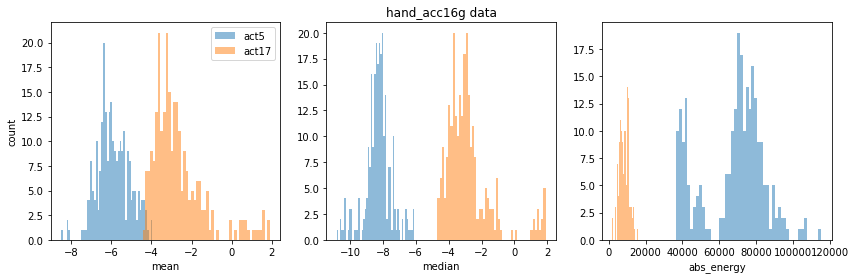

In [46]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(hand_acc16g_x_mean5, bins=50, label='act5', alpha=0.5)
plt.hist(hand_acc16g_x_mean17, bins=50, label='act17', alpha=0.5)
plt.xlabel('mean')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_median5, bins=50, alpha=0.5)
plt.hist(hand_acc16g_x_median17, bins=50, alpha=0.5)
plt.xlabel('median')
plt.title('hand_acc16g data')
plt.subplot(133)
plt.hist(hand_acc16g_x_absEnergy5, bins=50, alpha=0.5)
plt.hist(hand_acc16g_x_absEnergy17, bins=50, alpha=0.5)
plt.xlabel('abs_energy');

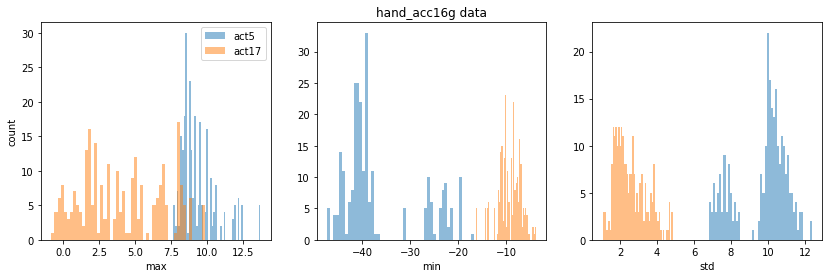

In [48]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
plt.hist(hand_acc16g_x_max5, bins=50, label='act5', alpha=0.5)
plt.hist(hand_acc16g_x_max17, bins=50, label='act17', alpha=0.5)
plt.xlabel('max')
plt.ylabel('count')
plt.legend()
plt.subplot(132)
plt.hist(hand_acc16g_x_min5, bins=50, alpha=0.5)
plt.hist(hand_acc16g_x_min17, bins=50, alpha=0.5)
plt.xlabel('min')
plt.title('hand_acc16g data')
plt.subplot(133)
plt.hist(hand_acc16g_x_std5, bins=50, alpha=0.5)
plt.hist(hand_acc16g_x_std17, bins=50, alpha=0.5)
plt.xlabel('std');

**Note:** max and min might not be very helpful since they spread out quite widely.